In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
conn = sqlite3.connect('../db.sqlite')
cur = conn.cursor()

# get data by joining game and mldata tables
games = cur.execute("""
                    SELECT Games.home_points, Games.away_points,
                    Games.home_pregame_elo, Games.away_pregame_elo, MLData.*
                    FROM Games JOIN MLData on Games.id = MLData.game_id""").fetchall()
conn.close()

In [110]:
games_df = pd.DataFrame(games)
games_df["error"] = games_df.iloc[:,1] - games_df.iloc[:,0] - round((games_df.iloc[:,3] - games_df.iloc[:,2])/25)
games_df["point_diff"] = games_df.iloc[:,0] - games_df.iloc[:,1]
games_df["avg_point_diff"] = games_df.iloc[:,35:49].mean(axis=1) - games_df.iloc[:,148:162].mean(axis=1)
games_df["avg_yard_diff"] = games_df.iloc[:,63:77].mean(axis=1) - games_df.iloc[:,176:190].mean(axis=1)
games_df["avg_yard_allowed_diff"] = games_df.iloc[:,77:91].mean(axis=1) - games_df.iloc[:,190:204].mean(axis=1)
games_df["home_point_diff"] = games_df.iloc[:,35:49].mean(axis=1) - games_df.iloc[:,49:63].mean(axis=1)
games_df["away_point_diff"] = games_df.iloc[:,148:162].mean(axis=1) - games_df.iloc[:,162:176].mean(axis=1)
games_df["point_diff_diff"] = games_df["home_point_diff"] - games_df["away_point_diff"]
games_df["home_turnover_diff"] = games_df.iloc[:,91:105].mean(axis=1) - games_df.iloc[:,105:119].mean(axis=1)
games_df["away_turnover_diff"] = games_df.iloc[:,204:218].mean(axis=1) - games_df.iloc[:,218:232].mean(axis=1)
games_df["turnover_diff_diff"] = games_df["home_turnover_diff"] - games_df["away_turnover_diff"]
games_df["home_yard_diff"] = games_df.iloc[:,63:77].mean(axis=1) - games_df.iloc[:,77:91].mean(axis=1)
games_df["away_yard_diff"] = games_df.iloc[:,176:190].mean(axis=1) - games_df.iloc[:,190:204].mean(axis=1)
games_df["yard_diff_diff"] = games_df["home_yard_diff"] - games_df["away_yard_diff"]
games_df["home_elo_diff"] = games_df.iloc[:,7:21].mean(axis=1) - games_df.iloc[:,21:35].mean(axis=1)
games_df["away_elo_diff"] = games_df.iloc[:,120:134].mean(axis=1) - games_df.iloc[:,134:248].mean(axis=1)
games_df["elo_diff_diff"] = games_df["home_elo_diff"] - games_df["away_elo_diff"]

In [112]:
games_df

,0,1,2,3,4,5,6,7,8,9,...,point_diff_diff,home_turnover_diff,away_turnover_diff,turnover_diff_diff,home_yard_diff,away_yard_diff,yard_diff_diff,home_elo_diff,away_elo_diff,elo_diff_diff
0,42,34,1557,1453,1,268,1557,1454,1624,1581,...,6.357143,0.500000,-0.500000,1.000000,-3.500000,2.785714,-6.285714,153.928571,1262.789474,-1108.860902
1,13,31,1563,1447,2,269,1563,1554,1519,1504,...,5.714286,0.285714,0.000000,0.285714,9.357143,-2.785714,12.142857,31.785714,1285.482456,-1253.696742
2,34,7,1556,1454,3,270,1556,1556,1570,1664,...,0.285714,0.000000,0.428571,-0.428571,10.285714,17.857143,-7.571429,139.500000,1287.757519,-1148.257519
3,16,14,1555,1455,4,271,1555,1559,1511,1537,...,-1.142857,0.285714,-1.142857,1.428571,-13.928571,44.000000,-57.928571,71.357143,1264.798246,-1193.441103
4,35,7,1554,1456,5,272,1554,1456,1494,1560,...,0.428571,-0.071429,0.000000,-0.071429,31.142857,25.714286,5.428571,79.928571,1326.424185,-1246.495614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,23,34,1378,1705,2684,3444,1378,1783,1453,1513,...,-8.142857,-0.285714,0.214286,-0.500000,23.071429,34.642857,-11.571429,74.071429,1280.529449,-1206.458020
2684,17,14,1535,1452,2685,3445,1535,1544,1554,1445,...,0.285714,0.285714,-0.428571,0.714286,-7.214286,-52.500000,45.285714,-51.428571,1286.867794,-1338.296366
2685,12,20,1660,1364,2686,3446,1660,1352,1556,1503,...,2.500000,0.142857,-0.071429,0.214286,-0.571429,-36.857143,36.285714,-87.214286,1256.855890,-1344.070175
2686,30,24,1504,1525,2687,3447,1504,1316,1456,1561,...,-2.142857,-0.357143,0.142857,-0.500000,3.714286,12.928571,-9.214286,-60.142857,1236.315789,-1296.458647


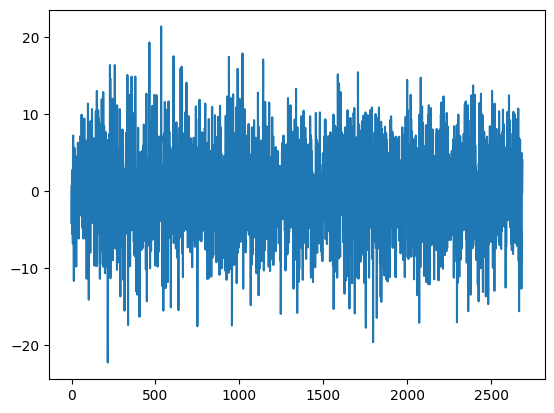

In [83]:
# plt.plot(games_df["error"].where(np.abs(games_df["error"]) < 10))
plt.plot(games_df["avg_point_diff"])
# plt.xlim(439,441)

In [111]:
corr = games_df[["error","point_diff", "elo_diff_diff",
                 "point_diff_diff", "turnover_diff_diff", "yard_diff_diff"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,error,point_diff,elo_diff_diff,point_diff_diff,turnover_diff_diff,yard_diff_diff
error,1.000000,-0.744855,0.114663,0.151682,0.141839,0.077443
point_diff,-0.744855,1.000000,0.277181,0.354471,0.212333,0.274870
elo_diff_diff,0.114663,0.277181,1.000000,0.807461,0.531533,0.601941
point_diff_diff,0.151682,0.354471,0.807461,1.000000,0.646956,0.718130
turnover_diff_diff,0.141839,0.212333,0.531533,0.646956,1.000000,0.184082
yard_diff_diff,0.077443,0.274870,0.601941,0.718130,0.184082,1.000000
